# Hyperparameter Tuning

In [1]:
# Initialization and Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
project_root = Path.cwd().parent  
sys.path.append(str(project_root)) 
from src.Optimise_param import *
from src.AHC import *

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


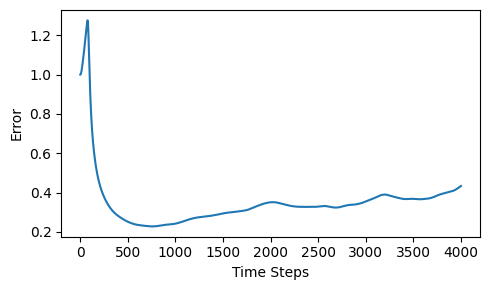

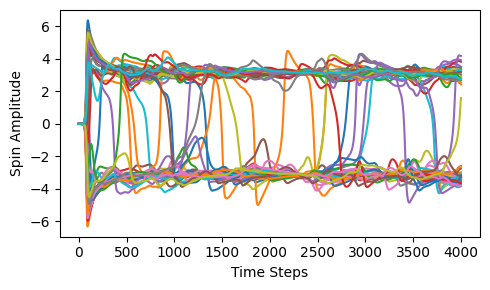

Energy reaches a steady state at: 3963


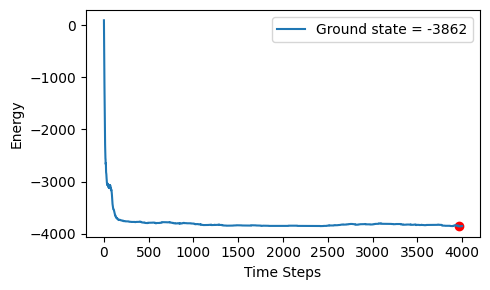

In [2]:
# J = - np.load('../MC_Instances/MC50_N=50_1.npz')
file_path = '../G_sets/G1.txt'

edges = []

with open(file_path, 'r') as file:
    next(file)  # Skip the first row
    for line in file:
        node1, node2, weight = map(int, line.split()) # Applies the int function, converting the strings to integers. 
        edges.append((node1 - 1, node2 - 1, weight))  # Adjust for 0-based indexing

num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
J_matrix = np.zeros((num_nodes, num_nodes))

for node1, node2, weight in edges:
    J_matrix[node1, node2] = weight
    J_matrix[node2, node1] = weight  # For undirected graphs

J = -J_matrix

eps_0 = 0.07
r_0 = 0.2

results = CIM_AHC_GPU(T_time=40, 
                      J=J, 
                      batch_size=1, 
                      beta=0.05, 
                      mu=0.5, 
                      noise=0,
                      time_step=0.01, 
                      custom_fb_schedule=None, 
                      custom_pump_schedule=None)

spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results

plot_results(results)

## Vary T_time

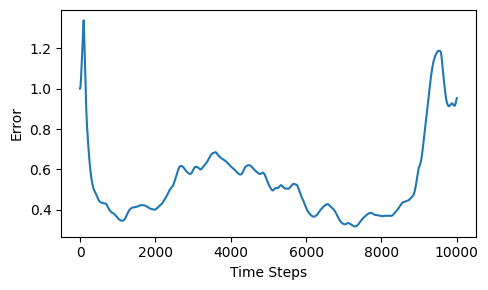

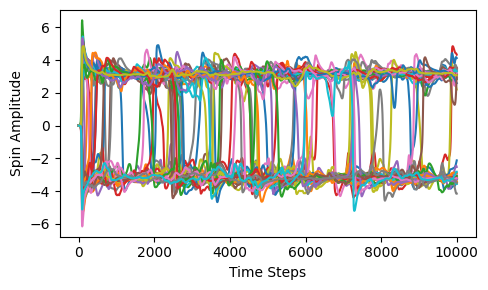

Energy reaches a steady state at: 8297


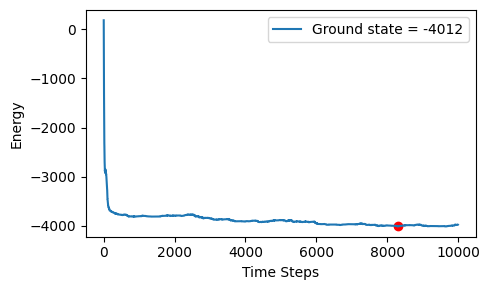

In [3]:
eps_0 = 0.07
r_0 = 0.2

results = CIM_AHC_GPU(T_time=100, 
                      J=J, 
                      batch_size=1, 
                      beta=0.05, 
                      mu=0.5, 
                      noise=0,
                      time_step=0.01, 
                      custom_fb_schedule=None, 
                      custom_pump_schedule=None)

spin_config, x_trajectory, t, energy_plot_data, error_var_data, divg, kappa = results

plot_results(results)

## Vary beta

Beta =  0


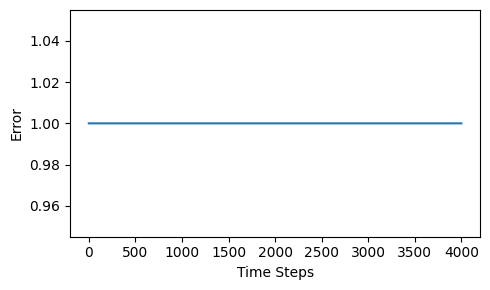

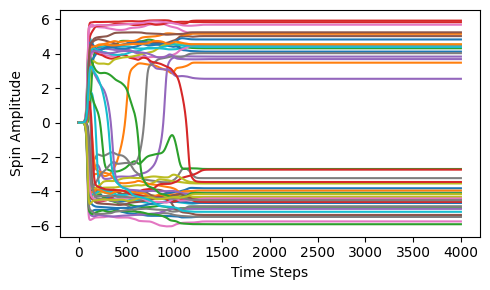

Energy reaches a steady state at: 1219


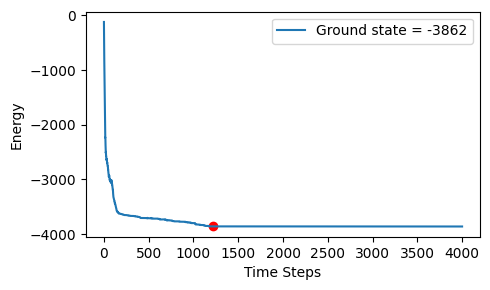



Beta =  0.05


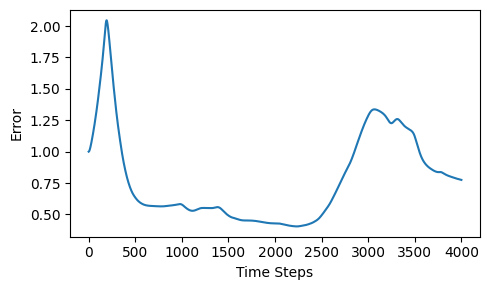

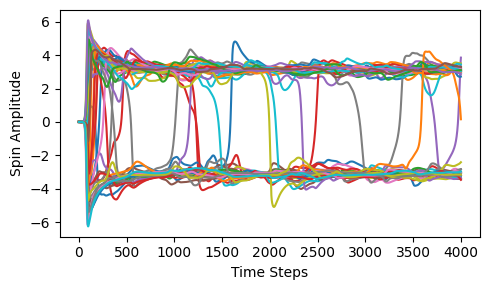

Energy reaches a steady state at: 2027


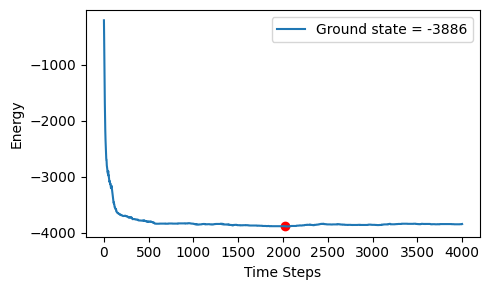



Beta =  0.5


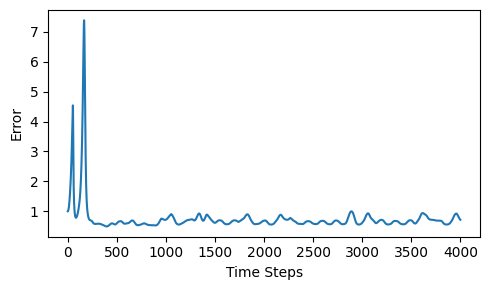

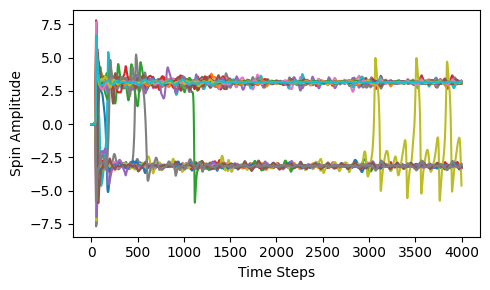

Energy reaches a steady state at: 1484


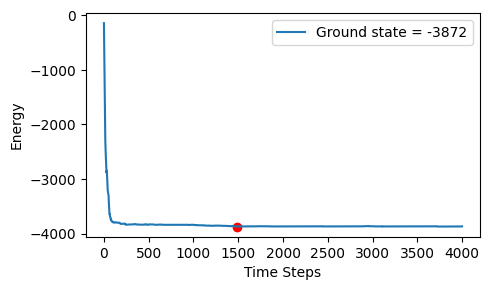



Beta =  5


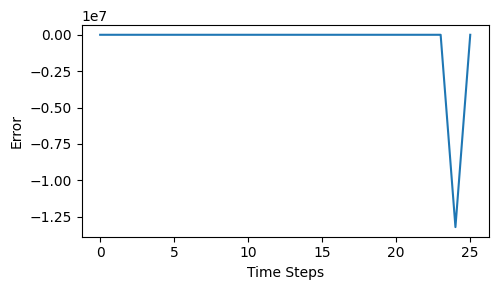

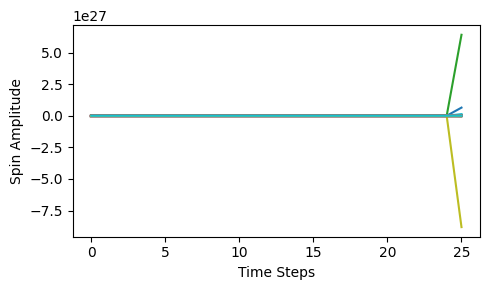

Energy reaches the lowest value at: 20 but doesn't remain stable for the next 5 steps.


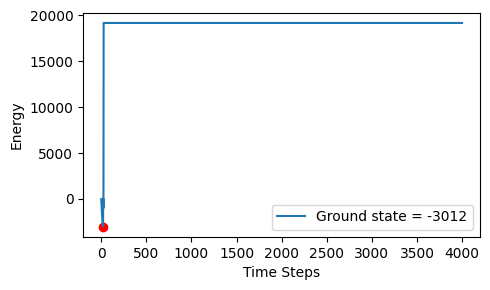

In [4]:
eps_0 = 0.07
r_0 = 0.2

for beta in [0, 0.05, 0.5, 5]:
    results = CIM_AHC_GPU(T_time=40, 
                        J=J, 
                        batch_size=1, 
                        beta=beta, 
                        mu=0.5, 
                        noise=0,
                        time_step=0.01, 
                        custom_fb_schedule=None, 
                        custom_pump_schedule=None)
    print('Beta = ', beta)
    plot_results(results)
    print('\n')

## Vary mu

mu =  0


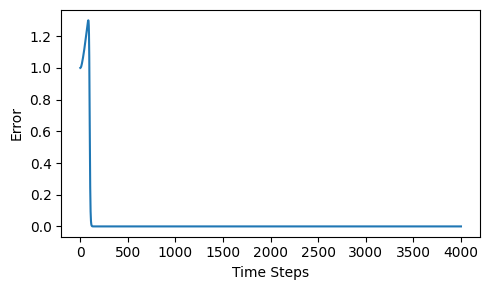

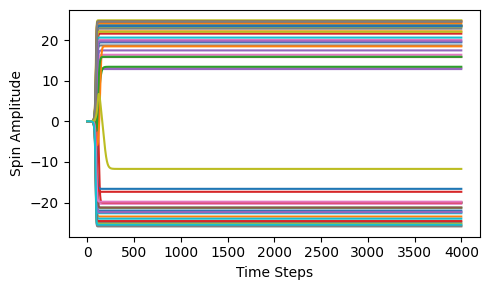

Energy reaches a steady state at: 231


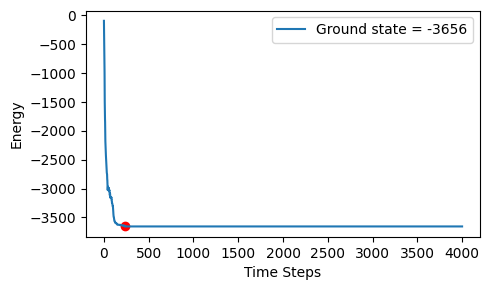



mu =  0.05


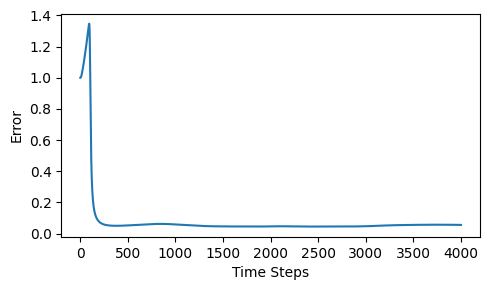

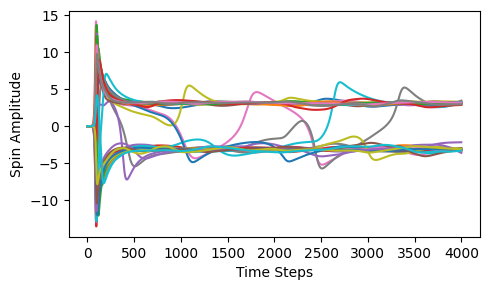

Energy reaches a steady state at: 3537


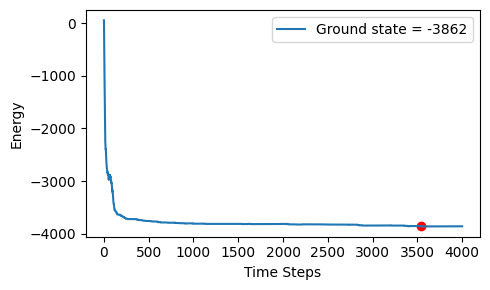



mu =  0.5


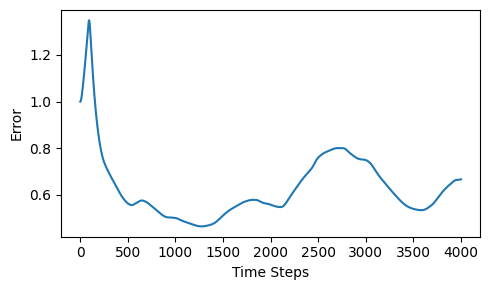

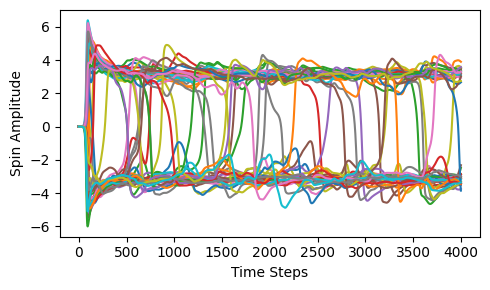

Energy reaches a steady state at: 2815


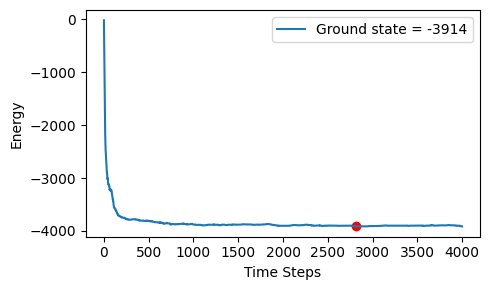



mu =  5


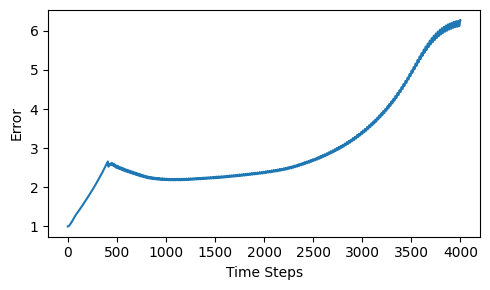

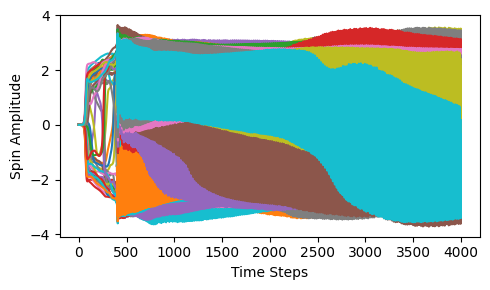

Energy reaches the lowest value at: 404 but doesn't remain stable for the next 5 steps.


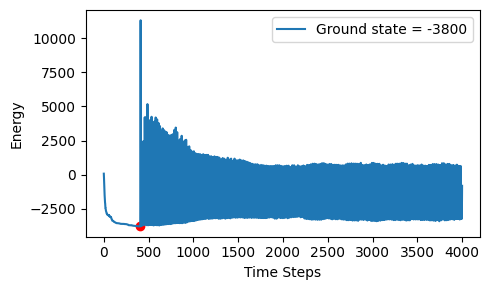

In [5]:
eps_0 = 0.07
r_0 = 0.2

for mu in [0, 0.05, 0.5, 5]:
    results = CIM_AHC_GPU(T_time=40, 
                        J=J, 
                        batch_size=1, 
                        beta=0.05, 
                        mu=mu, 
                        noise=0,
                        time_step=0.01, 
                        custom_fb_schedule=None, 
                        custom_pump_schedule=None)
    print('mu = ', mu)
    plot_results(results)
    print('\n')

## Vary noise

noise =  0


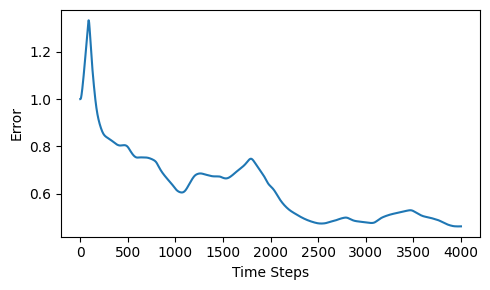

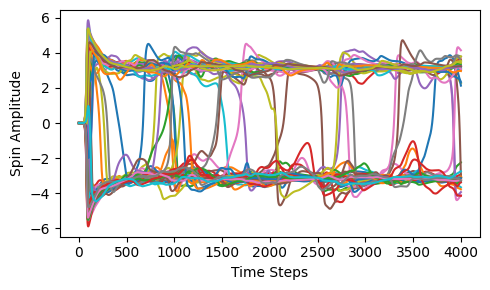

Energy reaches a steady state at: 2774


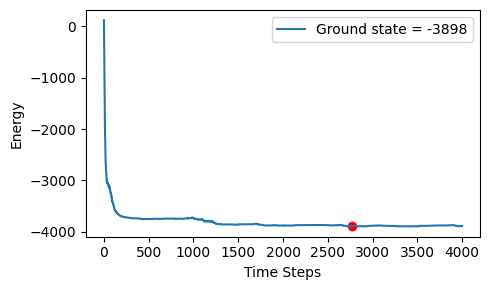



noise =  0.05


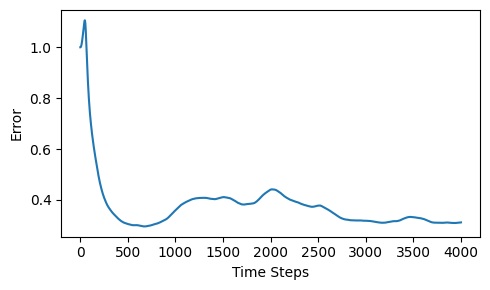

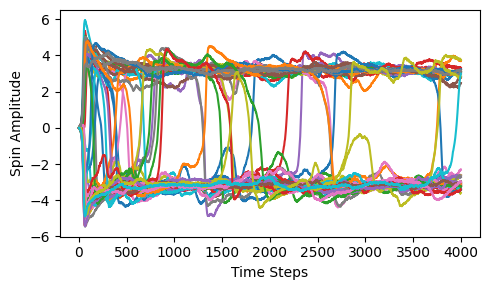

Energy reaches a steady state at: 2559


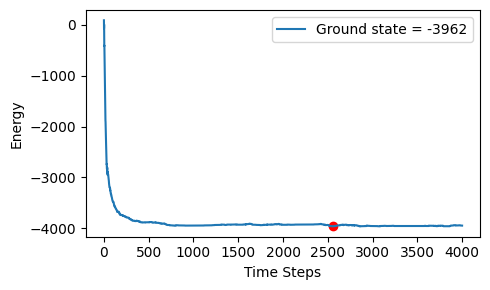



noise =  0.5


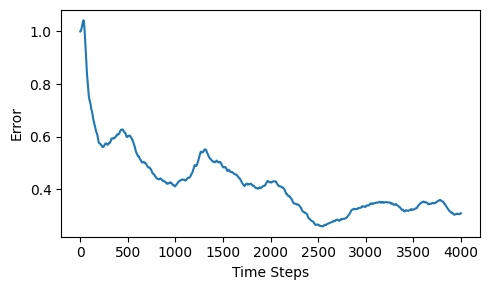

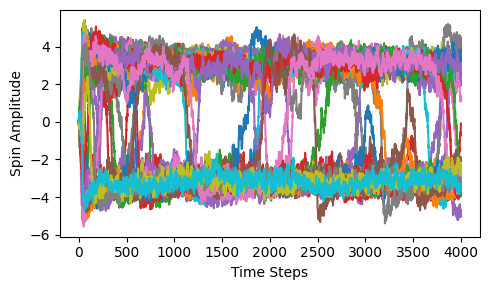

Energy reaches a steady state at: 1267


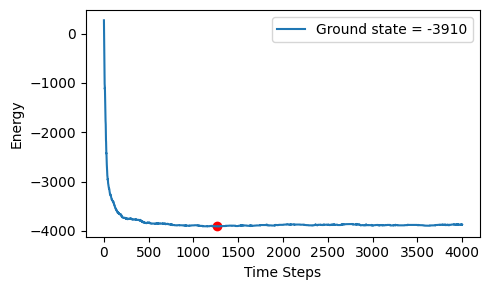



noise =  5


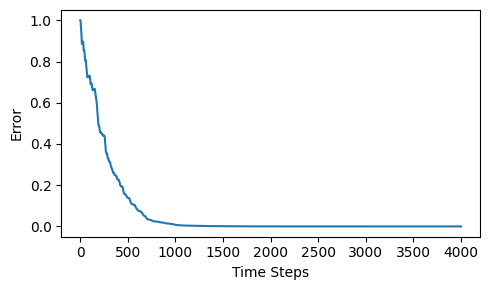

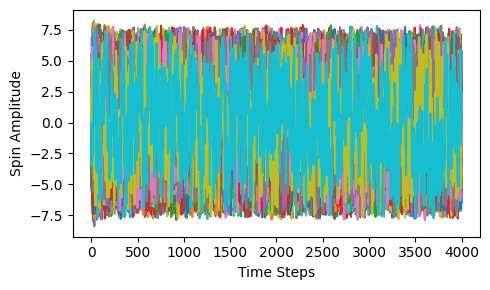

Energy reaches the lowest value at: 28 but doesn't remain stable for the next 5 steps.


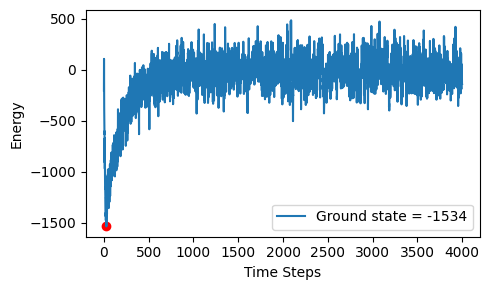

In [6]:
eps_0 = 0.07
r_0 = 0.2

for noise in [0, 0.05, 0.5, 5]:
    results = CIM_AHC_GPU(T_time=40, 
                        J=J, 
                        batch_size=1, 
                        beta=0.05, 
                        mu=0.5, 
                        noise=noise,
                        time_step=0.01, 
                        custom_fb_schedule=None, 
                        custom_pump_schedule=None)
    print('noise = ', noise)
    plot_results(results)
    print('\n')

## Vary eps_0

eps_0 =  0


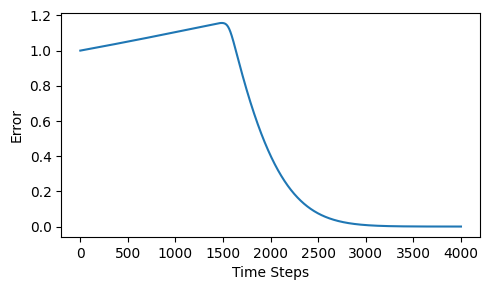

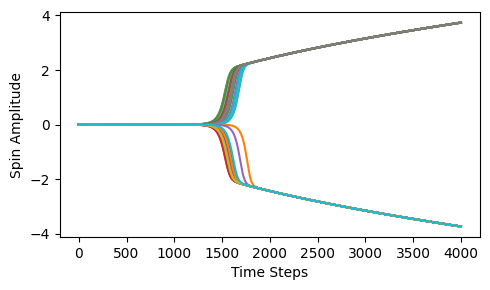

Energy reaches a steady state at: 0


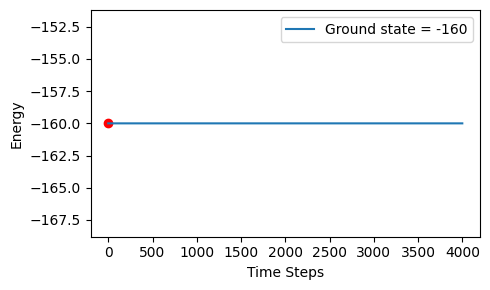



eps_0 =  0.05


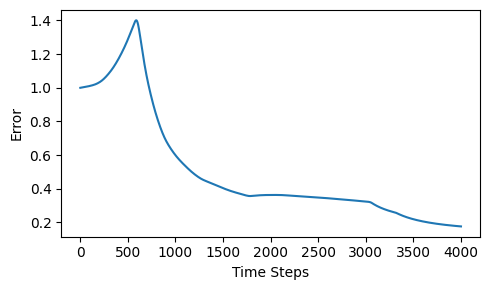

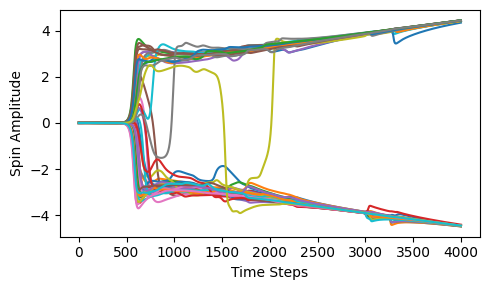

Energy reaches a steady state at: 3019


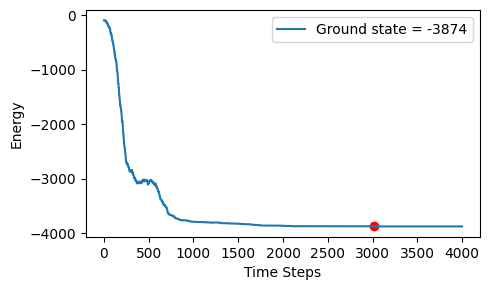



eps_0 =  0.5


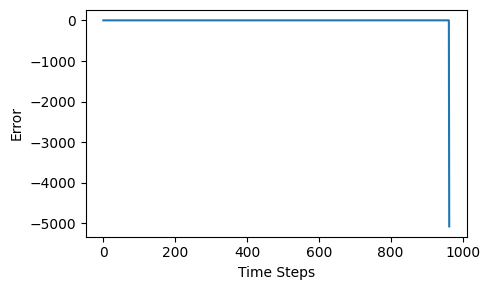

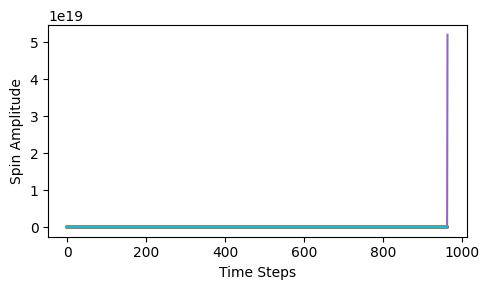

Energy reaches a steady state at: 768


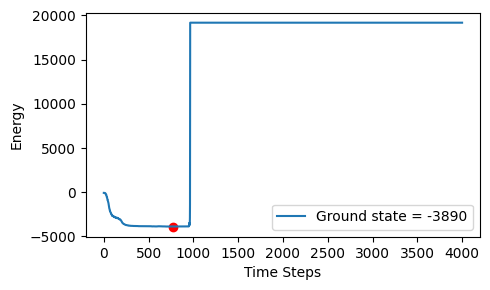



eps_0 =  5


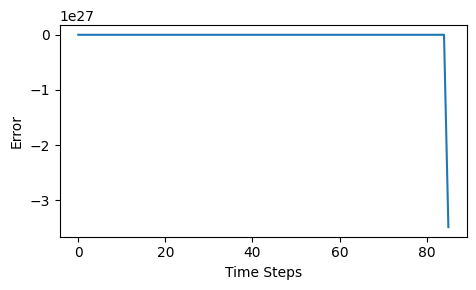

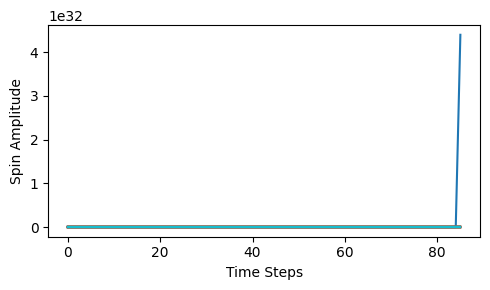

Energy reaches the lowest value at: 78 but doesn't remain stable for the next 5 steps.


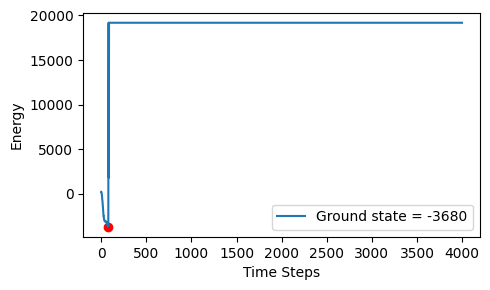

In [7]:
r_0 = 0.2

for i in [0, 0.05, 0.5, 5]:
    eps_0 = i
    results = CIM_AHC_GPU(T_time=40, 
                        J=J, 
                        batch_size=1, 
                        beta=0.05, 
                        mu=0.5, 
                        noise=0,
                        time_step=0.01, 
                        custom_fb_schedule=lambda ticks, time_step: custom_fb_schedule(ticks, time_step, eps_0), 
                        custom_pump_schedule=lambda ticks, time_step: custom_pump_schedule(ticks, time_step, r_0))

    print('eps_0 = ', eps_0)
    plot_results(results)
    print('\n')

## Vary r_0

r_0 =  0


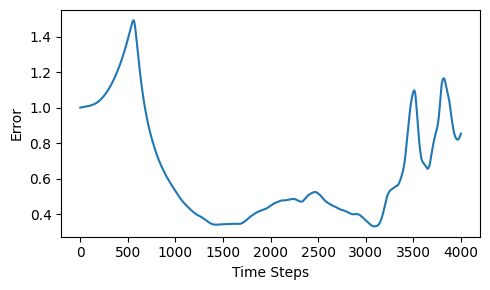

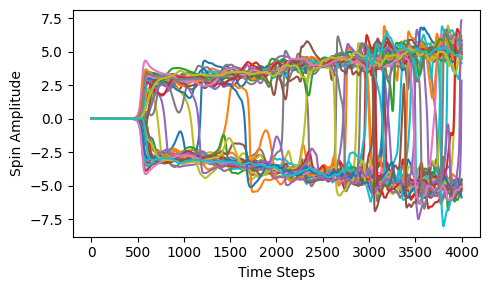

Energy reaches a steady state at: 2482


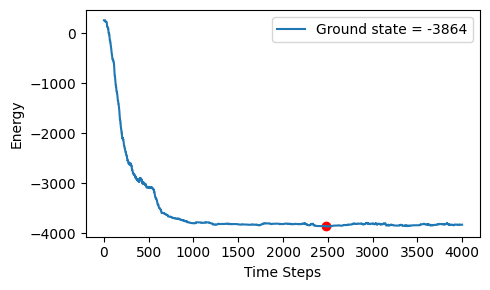



r_0 =  0.05


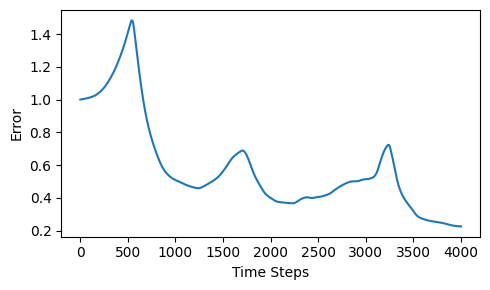

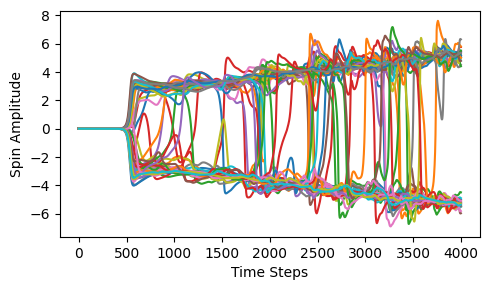

Energy reaches a steady state at: 2848


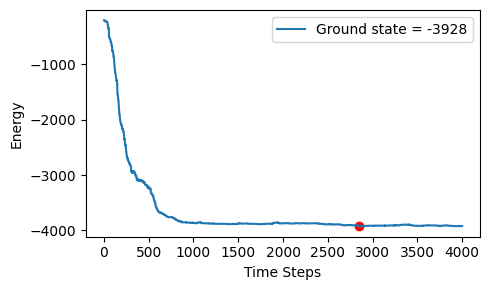



r_0 =  0.5


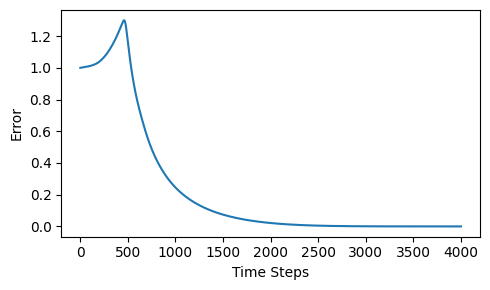

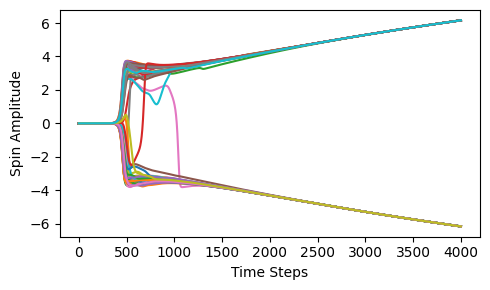

Energy reaches a steady state at: 2096


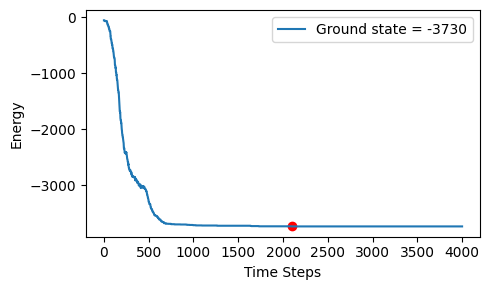



r_0 =  5


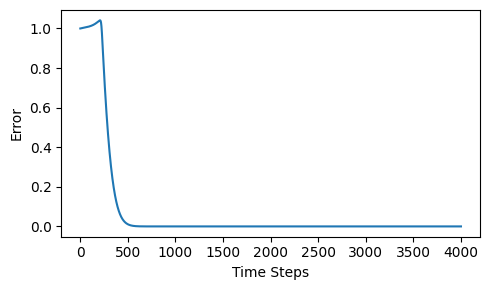

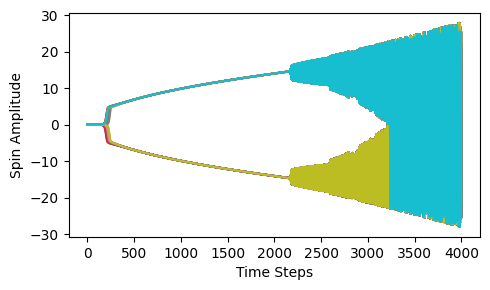

Energy reaches a steady state at: 241


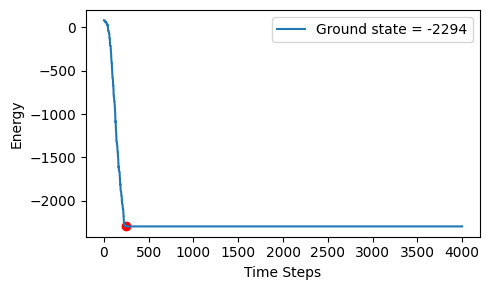

In [8]:
eps_0 = 0.07

for i in [0, 0.05, 0.5, 5]:
    r_0 = i
    results = CIM_AHC_GPU(T_time=40, 
                        J=J, 
                        batch_size=1, 
                        beta=0.05, 
                        mu=0.5, 
                        noise=0,
                        time_step=0.01, 
                        custom_fb_schedule=lambda ticks, time_step: custom_fb_schedule(ticks, time_step, eps_0), 
                        custom_pump_schedule=lambda ticks, time_step: custom_pump_schedule(ticks, time_step, r_0))

    print('r_0 = ', r_0)
    plot_results(results)
    print('\n')

# Scanning for all parameters

In [9]:
import mloop.interfaces as mli
import mloop.controllers as mlc

class CIMInterface(mli.Interface):
    def __init__(self, J_matrix):
        super(CIMInterface, self).__init__()
        self.J_matrix = J_matrix

    def get_next_cost_dict(self, params_dict):
        # Retrieve parameters from the params_dict.
        eps_0 = params_dict['params'][0]
        r_0 = params_dict['params'][1]
        beta = params_dict['params'][2]
        mu = params_dict['params'][3]
        noise = params_dict['params'][4]  

        # Call the CIM_AHC_GPU function with the new beta parameter.
        result = CIM_AHC_GPU(
            T_time=40,
            J=self.J_matrix,
            batch_size=1,
            time_step=0.01,
            beta=beta,  # Pass beta to the simulation
            mu=mu,
            noise=noise,
            custom_fb_schedule=lambda ticks, time_step: custom_fb_schedule(ticks, time_step, eps_0),
            custom_pump_schedule=lambda ticks, time_step: custom_pump_schedule(ticks, time_step, r_0)
        )
        final_energy = result[3].min() 
        return {'cost': final_energy, 'uncertainty': 0.1}

def mloop_optimize(J_matrix, min_boundary, max_boundary, max_num_runs=1000):
    # Ensure the boundaries are correctly expanded to include beta
    assert len(min_boundary) == 5 and len(max_boundary) == 5, "Boundaries must be lists of length 3 for eps_0, r_0, beta, mu and noise."

    interface = CIMInterface(J_matrix)
    controller = mlc.create_controller(
        interface=interface,
        controller_type='gaussian_process',
        max_num_runs=max_num_runs,
        num_params=5,
        param_names=['eps_0', 'r_0', 'beta', 'mu', 'noise'], 
        min_boundary=min_boundary,
        max_boundary=max_boundary
    )
    controller.optimize()
    return controller

J_matrix = J
min_boundary = [0.05, 0.05, 0.05, 0.4, 0]  # Example minimum boundaries for eps_0, r_0, and beta
max_boundary = [0.1, 0.2, 0.2, 0.8, 0.1]  # Example maximum boundaries for eps_0, r_0, and beta
controller = mloop_optimize(J_matrix, min_boundary, max_boundary)


INFO     M-LOOP version 3.3.4
INFO     Optimization started.
INFO     Run: 0 (training)
INFO     params [0.15351144 0.0818016  0.07419853 0.67666221 0.07196614]
INFO     cost -3932.0 +/- 0.0
INFO     Run: 1 (training)
INFO     params [0.16490463 0.14873822 0.12223199 0.60971546 0.08924351]
INFO     cost -3920.0 +/- 0.0
INFO     Run: 2 (training)
INFO     params [0.13189528 0.18697727 0.17243813 0.45825208 0.05269736]
INFO     cost -3848.0 +/- 0.0
INFO     Run: 3 (training)
INFO     params [0.18540753 0.17566186 0.10517795 0.40917278 0.0093332 ]
INFO     cost -3902.0 +/- 0.0
INFO     Run: 4 (training)
INFO     params [0.0864019  0.06360344 0.15640847 0.77246406 0.0204774 ]
INFO     cost -3956.0 +/- 0.0
INFO     Run: 5 (training)
INFO     params [0.1979402  0.06085128 0.05394538 0.71977154 0.03133166]
INFO     cost -3948.0 +/- 0.0
INFO     Run: 6 (training)
INFO     params [0.06030447 0.17401047 0.13396166 0.71302967 0.09445215]
INFO     cost -3774.0 +/- 0.0
INFO     Run: 7 (training)
IN

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 9.845238476876816e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -3992.0 +/- 0.0
INFO     Run: 17 (machine learner)
INFO     params [0.19989717 0.17080928 0.16878019 0.69921529 0.00851401]
INFO     cost -3978.0 +/- 0.0
INFO     Run: 18 (machine learner)
INFO     params [0.14814717 0.2        0.2        0.8        0.04301401]
INFO     cost -3928.0 +/- 0.0
INFO     Run: 19 (machine learner)
INFO     params [0.12213331 0.2        0.2        0.8        0.06035658]
INFO     cost -3922.0 +/- 0.0
INFO     Run: 20 (machine learner)
INFO     params [0.2        0.17070645 0.16867736 0.69894108 0.00844546]
INFO     cost -3934.0 +/- 0.0
INFO     Run: 21 (trainer)
INFO     params [0.12669771 0.18354059 0.09409414 0.66872706 0.08029492]
INFO     cost -3968.0 +/- 0.0
INFO     Run: 22 (machine learner)
INFO     params [0.19853048 0.17217596 0.17014688 0.70285979 0.00942513]
INFO     cost -3872.0 +/- 0.0
INFO     Run: 23 (machine learner)
INFO     params [0.2        0.119134   0.1171049  0.56141454 0.        ]
INFO     cost -3924.0 +/- 0.0
INFO     Run

/opt/anaconda3/envs/CIM/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


INFO     cost -3974.0 +/- 0.0
INFO     Run: 47 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3912.0 +/- 0.0
INFO     Run: 48 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3928.0 +/- 0.0
INFO     Run: 49 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -4036.0 +/- 0.0
INFO     Run: 50 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3992.0 +/- 0.0
INFO     Run: 51 (trainer)
INFO     params [0.06357541 0.18927204 0.06708869 0.45168102 0.01078502]
INFO     cost -3892.0 +/- 0.0
INFO     Run: 52 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3916.0 +/- 0.0
INFO     Run: 53 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3952.0 +/- 0.0
INFO     Run: 54 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO     cost -3880.0 +/- 0.0
INFO     Run: 55 (machine learner)
INFO     params [0.2  0.05 0.05 0.4  0.  ]
INFO  

# Results

In [17]:
print(
    f"eps_0: {controller.best_params[0]:.2f}, "
    f"r_0: {controller.best_params[1]:.2f}, "
    f"beta: {controller.best_params[2]:.2f}, "
    f"mu: {controller.best_params[3]:.2f}, "
    f"noise: {controller.best_params[4]:.2f}"
)

print(f'Best cost found: {controller.best_cost}')

eps_0: 0.19, r_0: 0.19, beta: 0.12, mu: 0.49, noise: 0.05
Best cost found: -4072.0


In [23]:
maxcut_energy = calculate_maxcut_energy(controller.best_cost, J)
print(f"Max-Cut Energy: {maxcut_energy}")

Max-Cut Energy: -11624.0
